# Build New Solver

To develop your new solver, inherit from `JSSolver` and implement method `do_solver()`.

1. Initialize an empty solution and specify solving mode.

    * direct_mode=True, solve start time directly;

    * direct_mode=False, solve operations sequence first and deduce start time.

    ```python
    solution = self.init_solution(direct_mode=False)
    ```

2. Solve or optimize the solution.

    - if direct_mode=True, i.e., **mathematical model**, solve `start_time` and assign to each operation explicitly.

    ```python
    for op in solution.ops:
        op.update_start_time(start_time)
    ``` 

    - direct_mode=False, e.g., **disjunctive graph model**, dispatch each operation according to solved sequence.

    ```python
    for op in solved_sequence_ops:
        solution.dispatch(op)
    ```

3. Update solution.

    call the following method when a better solution is found, which triggers updating Gantt chart dynamically and running user defined callback.
    
    ```python
    self.update_solution(solution)
    ```

In [1]:
from jsp import (JSProblem, JSSolution, JSSolver)


class UserSolver(JSSolver):
    '''Sample solver.'''

    def do_solve(self):
        '''A sample solving process: the sequence of operations assigned to each machine
        is determined by job id. Obviously, it's a feasible but far from optimal solution.
        '''
        # (1) Initialize an empty solution from problem
        solution = self.init_solution(direct_mode=False)

        # (2) Solve or optimize the solution, i.e., determine the start_time of
        # OperationStep instances. In this case, just sort operations by job id,
        # then create chain accordingly.
        ops = sorted(solution.ops, key=lambda op: op.source.job.id)
        solution.dispatch(ops)
        
        # (3) set final solution explicitly
        self.update_solution(solution)

optimum: 666
solved makespan: 2272.0


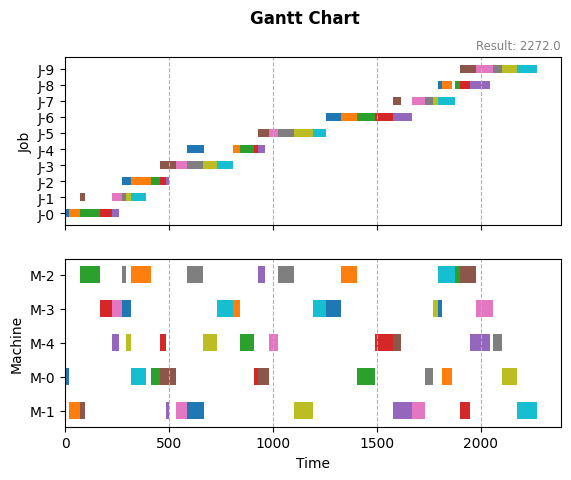

In [3]:
p = JSProblem(benchmark='la01')
s = UserSolver(problem=p)
s.solve()
s.wait()
print('optimum:', p.optimum)
print('solved makespan:', s.solution.makespan)
s.solution.plot_gantt_chart()